In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose,Normalize

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
transform = Compose([ToTensor(),Normalize((0.5,),(0.5,))])

In [ ]:
trainset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

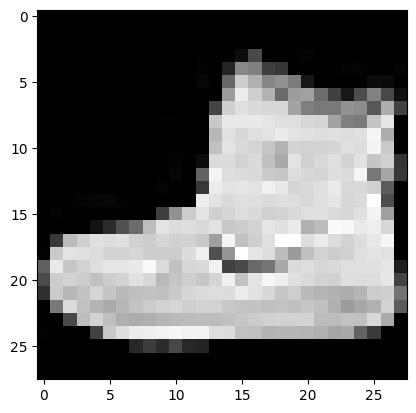

In [ ]:
import matplotlib.pyplot as plt
img,_ = trainset[0]
plt.imshow(img.squeeze(),cmap="gray")

In [ ]:
trainset = DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
testset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [ ]:
testset = DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)
model = model.to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Khởi tạo bias thành 0

# Áp dụng khởi tạo trọng số cho các lớp trong model
model.apply(initialize_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
def evaluate(model, testset,loss):
  model.eval()
  correct = 0
  total = 0
  test_loss = 0.0
  with torch.no_grad():
    for input,label in testset:
      input = input.to(device)
      label = label.to(device)
      output = model(input)
      loss_value = loss(output,label)
      _,predicted = torch.max(output.data,1)
      correct += (predicted == label).sum().item()
      total += label.size(0)
      test_loss += loss_value.item()
  test_loss = test_loss / len(testset)
  test_acc = 100 * correct / total
  return test_loss, test_acc

In [ ]:
max_epoch = 50
for epoch in range(max_epoch):
  correct = 0
  total = 0
  running_loss = 0.0
  for i, (input,label) in enumerate(trainset,0):
    input = input.to(device)
    label = label.to(device)
    optimizer.zero_grad()
    output = model(input)
    loss_value = loss(output,label)
    loss_value.backward()
    optimizer.step()

    _,predicted = torch.max(output.data,1)
    # print("torch.max(output.data,1)", torch.max(output.data,1))
    total += label.size(0)
    correct += (predicted == label).sum().item()
    # print("label.size(0)",label.size(0))

    running_loss += loss_value.item()


  epoch_acc = 100 * correct / total
  running_loss = running_loss / (i+1)
  test_loss, test_acc = evaluate(model, testset,loss)
  print(f"Epoch[{epoch+1}/{max_epoch}], Loss: {running_loss:.4f}, Accuracy: {epoch_acc:.4f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}%")


Epoch[1/50], Loss: 0.6337, Accuracy: 79.1167%, Test Loss: 0.5219, Test Accuracy: 81.7800%
Epoch[2/50], Loss: 0.4688, Accuracy: 83.4450%, Test Loss: 0.4991, Test Accuracy: 83.0300%
Epoch[3/50], Loss: 0.4578, Accuracy: 83.9483%, Test Loss: 0.4993, Test Accuracy: 82.0100%
Epoch[4/50], Loss: 0.4458, Accuracy: 84.4883%, Test Loss: 0.5024, Test Accuracy: 83.0200%
Epoch[5/50], Loss: 0.4248, Accuracy: 85.1650%, Test Loss: 0.4674, Test Accuracy: 84.4700%
Epoch[6/50], Loss: 0.4283, Accuracy: 85.3100%, Test Loss: 0.4763, Test Accuracy: 83.5600%
Epoch[7/50], Loss: 0.4487, Accuracy: 84.8717%, Test Loss: 0.4679, Test Accuracy: 84.1600%
Epoch[8/50], Loss: 0.4044, Accuracy: 85.7900%, Test Loss: 0.4613, Test Accuracy: 83.9800%
Epoch[9/50], Loss: 0.3933, Accuracy: 86.3333%, Test Loss: 0.4712, Test Accuracy: 83.1100%
Epoch[10/50], Loss: 0.3988, Accuracy: 86.0050%, Test Loss: 0.4388, Test Accuracy: 85.2600%
Epoch[11/50], Loss: 0.4071, Accuracy: 86.0033%, Test Loss: 0.4633, Test Accuracy: 84.5600%
Epoch[12